In [1]:
import numpy as np
import matplotlib.pyplot as plt
from bezier_utils.core import bezier_curve
from bezier_utils.attributes import osculating_circle_center
from bezier_utils.basic import extract_bezier_curves
from bezier_utils.display import plot_bezier_curves, plot_bezier_curves_by_cross_linear, plot_bezier_curves_by_curvature
from bezier_utils.circle_approx import process_bezier_and_circles

Number of loops detected: 1


/home/aarya/Desktop/Adobe_Gensolve/bezier_utils/attributes.py:22: RuntimeWarning: divide by zero encountered in divide
  radius_of_curvature = 1 / np.abs(curvature)
/home/aarya/Desktop/Adobe_Gensolve/bezier_utils/attributes.py:29: RuntimeWarning: invalid value encountered in divide
  normal /= np.linalg.norm(normal, axis=1, keepdims=True)


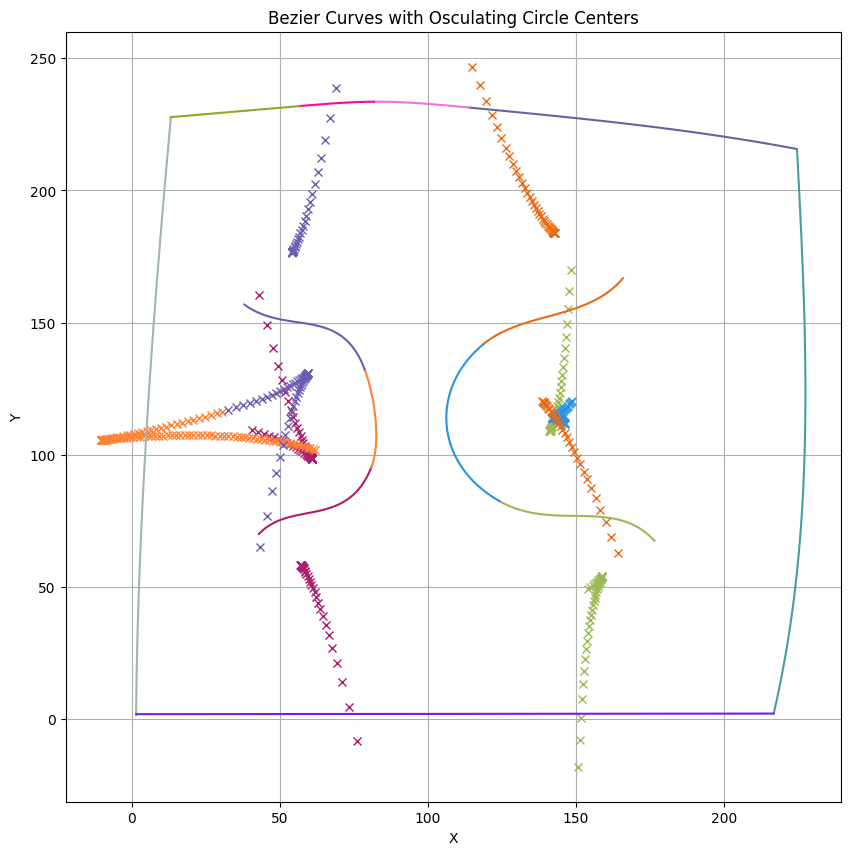

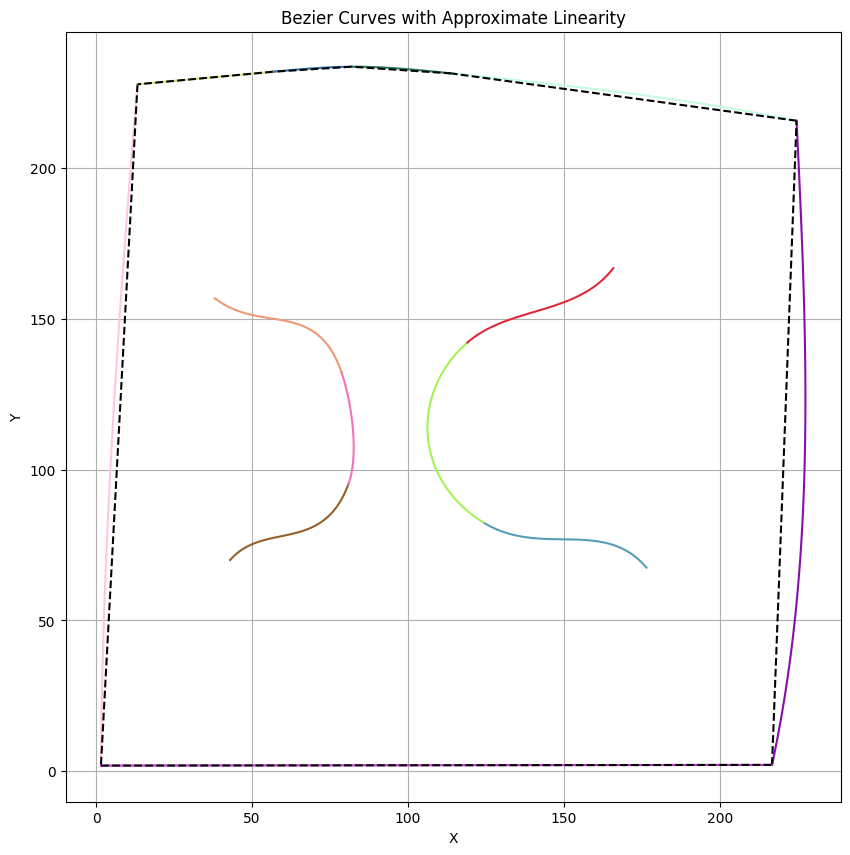

In [2]:
# print(extract_bezier_curves('data/problems/frag0.svg')[0])
# print(process_bezier_and_circles(extract_bezier_curves('data/problems/frag0.svg')[0]))
non_looped_curves, looped, circle_fits = process_bezier_and_circles(extract_bezier_curves('data/problems/frag0.svg')[0])
# print(non_looped_curves)
plot_bezier_curves(non_looped_curves,extract_bezier_curves('data/problems/frag0.svg')[1], threshold=100.0)
plot_bezier_curves_by_cross_linear(non_looped_curves,extract_bezier_curves('data/problems/frag0.svg')[1], threshold=100.0, linear_tolerance=0.0525, show_centers=False)